<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-3/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation Metrics:
Accuracy: 0.8247
Precision: 0.7632
Recall: 0.6170
F1 Score: 0.6824

Training Accuracy:   0.7622
Validation Accuracy: 0.8247

Confusion Matrix Values:
True Negatives (TN):  98
False Positives (FP): 9
False Negatives (FN): 18
True Positives (TP):  29


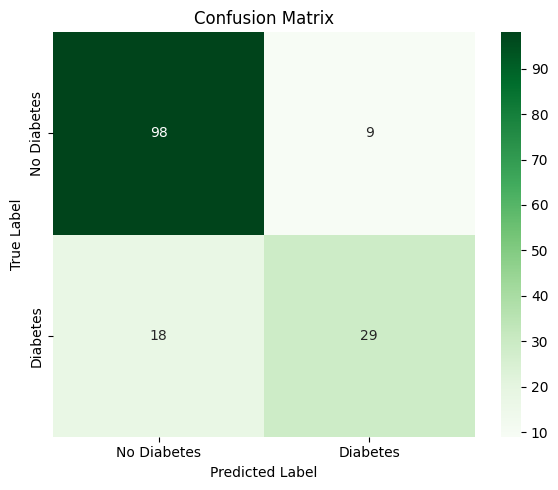

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# We've used diabetes dataset for HW3
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
df = pd.read_csv(url)

# I've separated input features and target
X_in = df.drop('Outcome', axis=1)
y_out = df['Outcome']

# I've splited the data into 80/20 (training/validation)
X_train, X_test, y_train, y_test = train_test_split(X_in, y_out, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression
logreg = LogisticRegression(random_state=0, max_iter=1200)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = logreg.predict(X_train_scaled)
y_pred = logreg.predict(X_test_scaled)

# Train & validation accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred)

# Evaluation metrics on validation set
accuracy = val_accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print(f"\nTraining Accuracy:   {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Confusion matrix values
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix Values:")
print(f"True Negatives (TN):  {cm[0, 0]}")
print(f"False Positives (FP): {cm[0, 1]}")
print(f"False Negatives (FN): {cm[1, 0]}")
print(f"True Positives (TP):  {cm[1, 1]}")

# Confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
